# RGB to Black and White Image Converter

This notebook demonstrates how to convert an RGB (color) image to black and white (grayscale).

In [2]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Load an RGB Image

Replace the path below with the path to your image file.

In [9]:
# Load the RGB image
# Replace 'your_image.jpg' with the path to your image
image_path = 'building.jpg'  # Change this to your image path

try:
    rgb_image = Image.open(image_path)
    print(f"Image loaded successfully!")
    print(f"Image size: {rgb_image.size}")
    print(f"Image mode: {rgb_image.mode}")
except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found.")
    print("Please update the 'image_path' variable with a valid image path.")
    rgb_image = None

Image loaded successfully!
Image size: (1334, 2000)
Image mode: RGB


## Display the Original RGB Image

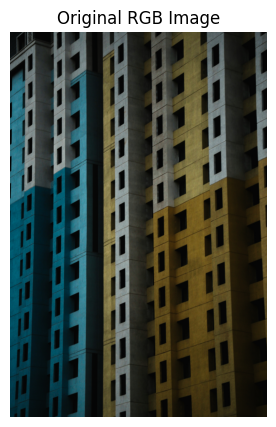

In [10]:
# Display the original RGB image
if rgb_image is not None:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_image)
    plt.title('Original RGB Image')
    plt.axis('off')
    plt.show()

## Convert to Black and White (Grayscale)

There are multiple methods to convert RGB to grayscale. We'll use the standard luminance formula.

In [11]:
# Method 1: Using PIL's convert() function (simplest method)
if rgb_image is not None:
    bw_image = rgb_image.convert('L')  # 'L' mode is grayscale (8-bit pixels, black and white)
    print("Image converted to grayscale using PIL's convert() method")

Image converted to grayscale using PIL's convert() method


## Alternative Method: Using Luminance Formula

You can also convert manually using the standard luminance formula: `0.299*R + 0.587*G + 0.114*B`

In [12]:
# Method 2: Manual conversion using luminance formula
if rgb_image is not None:
    # Convert to RGB mode if not already (handles RGBA, P, etc.)
    if rgb_image.mode != 'RGB':
        rgb_image = rgb_image.convert('RGB')
    
    # Convert to numpy array
    img_array = np.array(rgb_image)
    
    # Apply luminance formula: 0.299*R + 0.587*G + 0.114*B
    bw_array = np.dot(img_array[...,:3], [0.299, 0.587, 0.114])
    bw_image_manual = Image.fromarray(bw_array.astype('uint8'), mode='L')
    
    print("Image converted to grayscale using manual luminance formula")

Image converted to grayscale using manual luminance formula


## Display the Results

Compare the original RGB image with the black and white version.

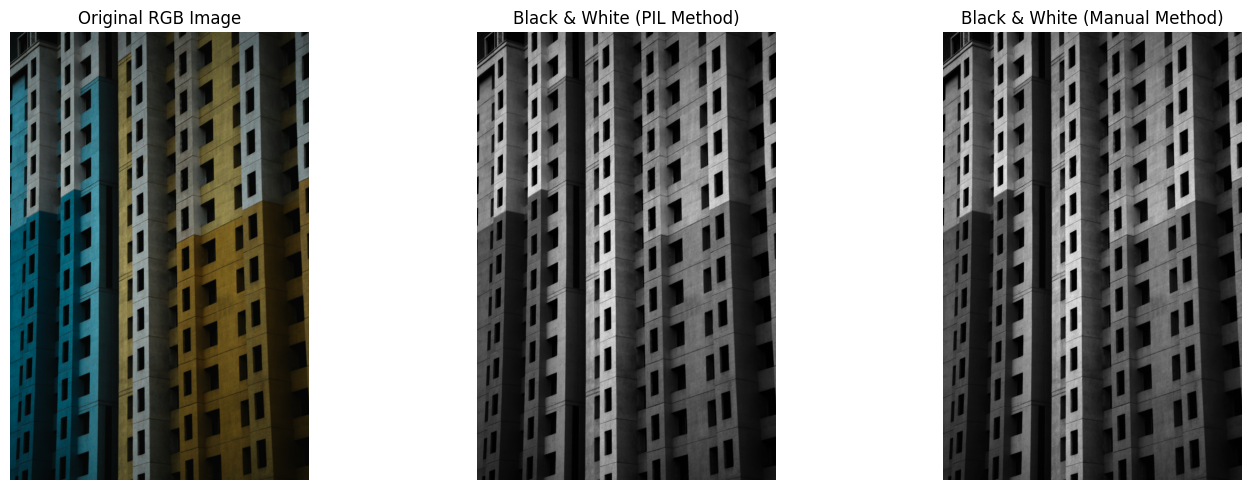

In [13]:
# Display both images side by side
if rgb_image is not None:
    plt.figure(figsize=(15, 5))
    
    # Original RGB image
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image)
    plt.title('Original RGB Image', fontsize=12)
    plt.axis('off')
    
    # Black and white (PIL method)
    plt.subplot(1, 3, 2)
    plt.imshow(bw_image, cmap='gray')
    plt.title('Black & White (PIL Method)', fontsize=12)
    plt.axis('off')
    
    # Black and white (Manual method)
    plt.subplot(1, 3, 3)
    plt.imshow(bw_image_manual, cmap='gray')
    plt.title('Black & White (Manual Method)', fontsize=12)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Save the Black and White Image

Save the converted image to a file.

In [14]:
# Save the black and white image
if rgb_image is not None:
    output_path = 'output_bw_image.jpg'  # Change this to your desired output path
    bw_image.save(output_path)
    print(f"Black and white image saved to: {output_path}")

Black and white image saved to: output_bw_image.jpg
